In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('u.data', sep='\t')
# Datamız daki veriler "tab" ile ayrıldığından (sep='\t') kullandık. Datamızın uzantısında .csv olmadığı için yazmadık.

In [3]:
df.head()

,0,50,5,881250949
0,0,172,5,881250949
1,0,133,1,881250949
2,196,242,3,881250949
3,186,302,3,891717742
4,22,377,1,878887116


In [4]:
df.columns = ['user_id', 'item_id', 'rating', 'timestamp']
# Datamıza columns isimlerini atıyoruz. 

In [5]:
df.head()
# Columns isimleri atanmış hali

,user_id,item_id,rating,timestamp
0,0,172,5,881250949
1,0,133,1,881250949
2,196,242,3,881250949
3,186,302,3,891717742
4,22,377,1,878887116


In [6]:
df.shape

(100002, 4)

In [7]:
movie_titles = pd.read_csv('Movie_Id_Titles')
# Datamızın uzantısında .csv olmadığı için yazmadık.

In [8]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [9]:
df = pd.merge(df, movie_titles, on='item_id')
# df ve movie_titles DataFrame leri her ikisinde ortak olan (item_id) sütunu kullanak birleştiriyoruz ve df DataFrame eşitliyoruz.

In [10]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,172,5,881250949,"Empire Strikes Back, The (1980)"
1,213,172,5,878955442,"Empire Strikes Back, The (1980)"
2,92,172,4,875653271,"Empire Strikes Back, The (1980)"
3,77,172,3,884752562,"Empire Strikes Back, The (1980)"
4,194,172,3,879521474,"Empire Strikes Back, The (1980)"


In [11]:
df.info()
# Missing values yoktur.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100002 entries, 0 to 100001
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    100002 non-null  int64 
 1   item_id    100002 non-null  int64 
 2   rating     100002 non-null  int64 
 3   timestamp  100002 non-null  int64 
 4   title      100002 non-null  object
dtypes: int64(4), object(1)
memory usage: 4.6+ MB


In [12]:
for column in df.columns:
    print(f'Colum. {column} has {df[column].nunique()} unique values.')
# df in herbir sütunundaki unique değerleri kontrol ediyoruz.

Colum. user_id has 944 unique values.
Colum. item_id has 1682 unique values.
Colum. rating has 5 unique values.
Colum. timestamp has 49282 unique values.
Colum. title has 1664 unique values.


### EDA

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')

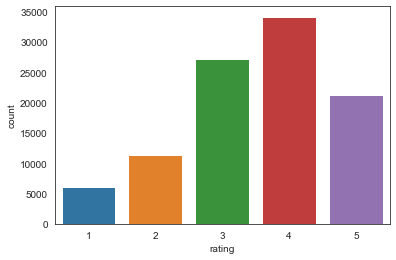

In [14]:
sns.countplot(x='rating', data=df);
# rating sütunumuzdaki değerler numerik olduğu için histplot da kullanılabilir.

In [15]:
df.rating.value_counts()

4    34174
3    27145
5    21202
2    11370
1     6111
Name: rating, dtype: int64

<AxesSubplot:>

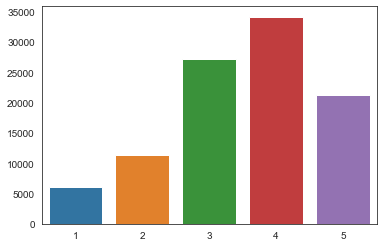

In [16]:
sns.barplot(x=df.rating.value_counts().index, y=df.rating.value_counts().values)
# rating değerlerinin barplot ile gösterimi

In [17]:
df.shape

(100002, 5)

In [18]:
df.title.nunique()
# nunique() title sütunundaki unique değerleri gösteriyor.

1664

In [19]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)
# Filmlerin rating ortalamalarını kontrol ediyoruz. They Made Me a Criminal (1939) rating ortalaması göze çarpıyor bu yüzden filmlere yapılan rating sayılarını da hesaba katacağız. Çünkü bir filmi sadece bir user ın izleyip 5.0 vermesi bu filmi diğerleri ile karşılaştırmak için doğru olmaz.

title
They Made Me a Criminal (1939)                       5.0
Marlene Dietrich: Shadow and Light (1996)            5.0
Saint of Fort Washington, The (1993)                 5.0
Someone Else's America (1995)                        5.0
Star Kid (1997)                                      5.0
Great Day in Harlem, A (1994)                        5.0
Aiqing wansui (1994)                                 5.0
Santa with Muscles (1996)                            5.0
Prefontaine (1997)                                   5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Name: rating, dtype: float64

In [20]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)
# Filmlere yapılan rating sayılarını kontrol ediyoruz. Ve belli bir rating sayısına göre seçim yapacağız.

title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

In [21]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
# rating ortalamalarını DataFrame olarak atıyoruz. 

In [22]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
# Oluşturduğumuz rating DataFrame rating sayılarını da sütun olarak ekliyoruz.

In [23]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [24]:
ratings.shape

(1664, 2)

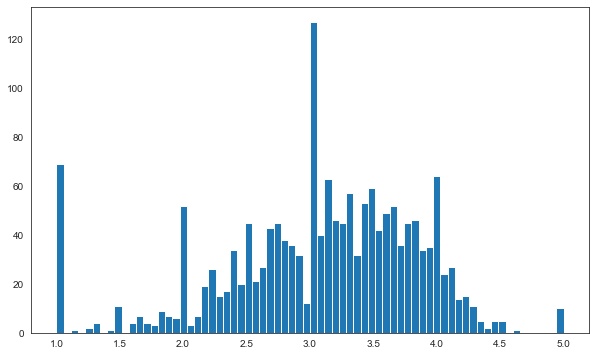

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(ratings.rating, bins=70);
# ratings in rating sütununun hisplot ile dağılımıı kontrol ediyoruz.

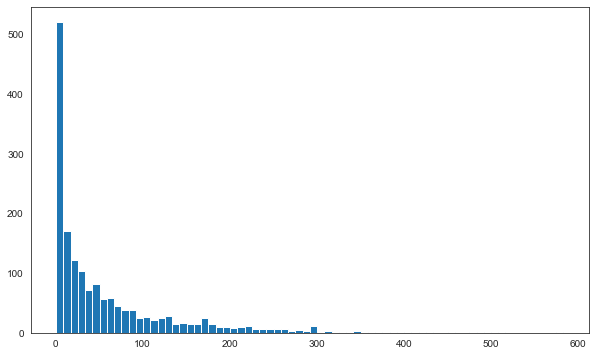

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(ratings['num of ratings'], bins=70);
# ratings in num of ratings sütununun hisplot ile dağılımıı kontrol ediyoruz ki film önerisi için bir eşik değer belirleyebilelim. Bu eşik değer tercihlere göre değişebilir.

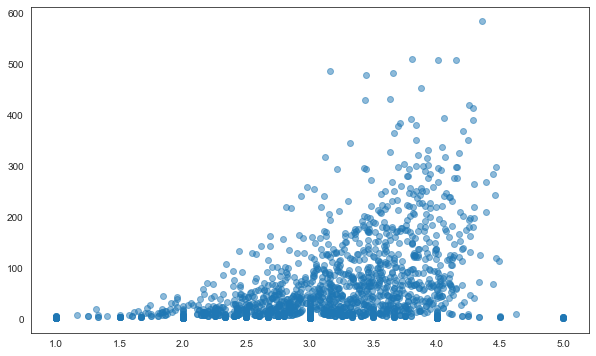

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(x=ratings.rating, y=ratings['num of ratings'], alpha=0.5)
# rating ve rating sayılarını scatterplot la birlikte gösteriyoruz. Bu bize hangi bölgeye göre eşik değeri 

<Figure size 720x432 with 0 Axes>

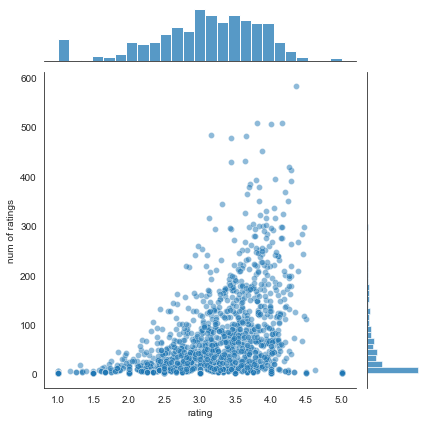

In [28]:
plt.figure(figsize=(10, 6))
sns.jointplot(x='rating', y='num of ratings', data=ratings, alpha=0.5);
# Burada scatterplot la birlikte dağılım grafiğini de çizdirerek eşik değerimizi belirleyecağiz.

### Recommending Similar Movies

In [29]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,172,5,881250949,"Empire Strikes Back, The (1980)"
1,213,172,5,878955442,"Empire Strikes Back, The (1980)"
2,92,172,4,875653271,"Empire Strikes Back, The (1980)"
3,77,172,3,884752562,"Empire Strikes Back, The (1980)"
4,194,172,3,879521474,"Empire Strikes Back, The (1980)"


In [30]:
moviemat = df.pivot_table(values='rating', index='user_id', columns='title')
# maviemat adında bir pivot table oluşturuyoruz.

In [31]:
moviemat.head()
# pivot table sonrası bir çok NaN değeri görmemizin nedeni herhangi bir filmi bütün user ların izlememiş olması   

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
ratings.sort_values('num of ratings', ascending=False).head(10)
# rating DataFrame mizdeki en yüksek rating ortalaması ve rating sayısına göre sıralama yapıyoruz.

,rating,num of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [33]:
liarliar_user_ratings = moviemat['Liar Liar (1997)']
# En yüksek scores alan filmler içerisinden Liar Liar (1997) ve Star Wars (1977) seçerek bunlara benzer filmleri bulmaya çalışacağız.

In [34]:
starwars_user_ratings = moviemat['Star Wars (1977)']

In [35]:
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)
# Burada corrwith fonksiyonunu kullanarak liarliar_user_ratings Series ile moviemat DataFrame arasındaki correlation a bakarak bu filme benzer filmleri bulacağız.

C:\Users\Ertuğrul\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Ertuğrul\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [36]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
# Yukarıdaki işlemi starwars_user_rating Series e uyguluyoruz.
# NOT: corrwith() fonksiyonu Series to Series, Series to DataFrame arasındaki correlation değerlerini hesaplıyor .

In [37]:
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [38]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])
# Star Wars (1977) için hesaplanan correlation değerlerini DataFrame dönüştürüyoruz.

In [39]:
corr_starwars.isnull().sum()

Correlation    254
dtype: int64

In [40]:
corr_starwars.dropna(inplace=True)
# corr_starwars ile correlation olmayan filmleri (NaN) düşürüyoruz.

In [41]:
corr_starwars.sort_values('Correlation', ascending=False).head(10)
# Burada sadece rating ortalamalarının correlation nı na göre işlem yaptığımız için bizim beklediğimiz değerler gelmedi.

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [42]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
# Yukarıda gerçeği yansıtmayan correlation değerlerinden kurtulmak için corr_starwars ile ratings['num of ratings'] değerlerini join yapıyoruz.

In [43]:
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [44]:
corr_starwars[(corr_starwars['num of ratings']>100) & (corr_starwars['Correlation']>0.5)].sort_values('Correlation', ascending=False).head(10)
# Burada eşik değeri olarak rating sayısını 100 den büyük ve correlation değerini de 0.5 den büyük olarak belirleyerek bu koşullara göre Star Wars (1977) filmi ile benzer filmleri buluyoruz. 

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
